DESCRIPTIVE STATISTICS

BOX 1 importing all the packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from sklearn.preprocessing import StandardScaler, MinMaxScaler

BOX 2 reading the csv + checking each column for null values

In [5]:
df = pd.read_csv('courses.csv', index_col=0)
has_nulls = df.isnull().any()
print(has_nulls)

Course_Name            False
Category               False
Duration (hours)       False
Enrolled_Students      False
Completion_Rate (%)    False
Platform               False
Price ($)              False
Rating (out of 5)      False
dtype: bool


BOX 3 checking for duplicates

In [6]:
course_counts = df['Course_Name'].value_counts()

duplicates = course_counts[course_counts > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


BOX 4 outliers detection using IQR !! look for why 1.5

In [7]:
outliers_dict = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    
    outliers_dict[column] = outliers

for col, outliers in outliers_dict.items():
    print(f"Outliers for {col}:\n{outliers}\n")

Outliers for Duration (hours):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Enrolled_Students:
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Completion_Rate (%):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Price ($):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Rating (out of 5):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []



BOX 5 box plots for every numeric variable

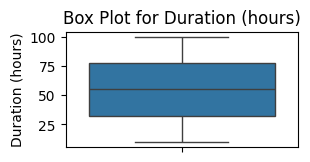

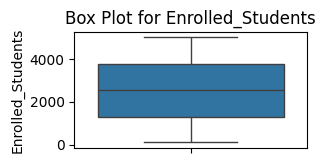

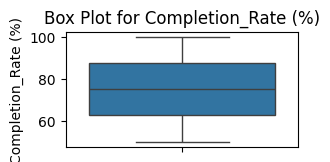

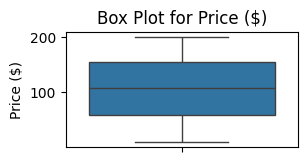

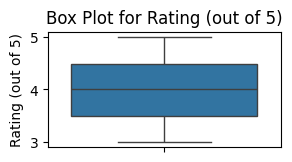

In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    plt.figure(figsize=(3, 1.5))
    sns.boxplot(y=df[column])  
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

    BOX 6 Perform a Chi-Square Test for Goodness of Fit on observed categorical counts.

    Parameters:
        observed_counts (list or array): The observed counts for each category.
        alpha (float): Significance level for the test (default is 0.05).

    Returns:
        dict: A dictionary containing the chi-square statistic, p-value, and test result.

function for chi_square test. used for checking the statistically significance of some data later on

In [9]:
def chi_square_test(observed_values, alpha=0.05):

    expected_counts = [sum(observed_values) / len(observed_values)] * len(observed_values)

    chi2_stat, p_value = chisquare(f_obs=observed_values, f_exp=expected_counts)

    result = "reject the null hypothesis" if p_value < alpha else "fail to reject the null hypothesis"
    
    # print(f"Chi-Square Statistic: {chi2_stat}")
    # print(f"P-Value: {p_value}")
    # print(f"Result: {result}")

    # print(f"Observed Values: {observed_values}")
    # print(f"Expected Values: {expected_counts}")
    # print(f"Chi-Square Statistic: {chi2_stat}")
    # print(f"P-Value: {p_value}")
    # print(f"Result: {result}")
    
    return {
        f"Chi-Square Statistic: {chi2_stat}",
        f"P-Value: {p_value}",
        f"Result: {result}"
    }



starts with charts

BOX 7 BARCHART: count all the courses regardless of platform, taking into account only the category

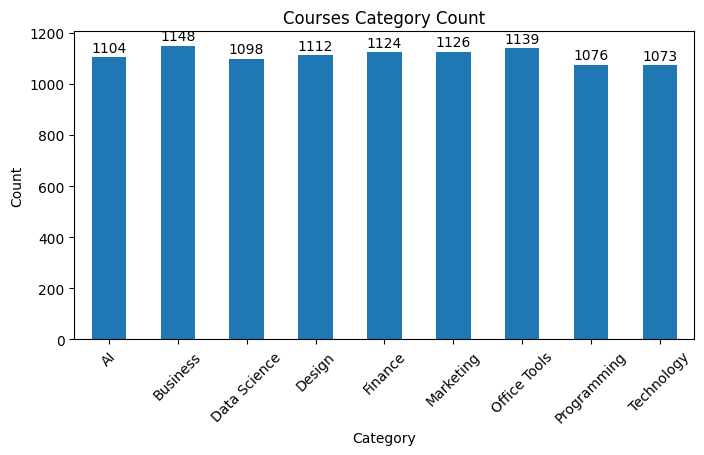

In [10]:
category = df.groupby('Category')['Category'].count()

plt.figure(figsize=(8, 4))
for i, v in enumerate(category.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
category.plot(kind='bar')
plt.title('Courses Category Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

BOX 8 Chi-Square Test for Goodness of Fit
H₀: all categories have an equal count of courses
H₁: at least one category has a different count of courses

In [11]:
observed_counts_cat = category.values  
chi_square_test(observed_counts_cat)

{'Chi-Square Statistic: 4.8914',
 'P-Value: 0.7691179196998144',
 'Result: fail to reject the null hypothesis'}

BOX 9 BARCHART: avg duration for each course per category, regardeless of the platform

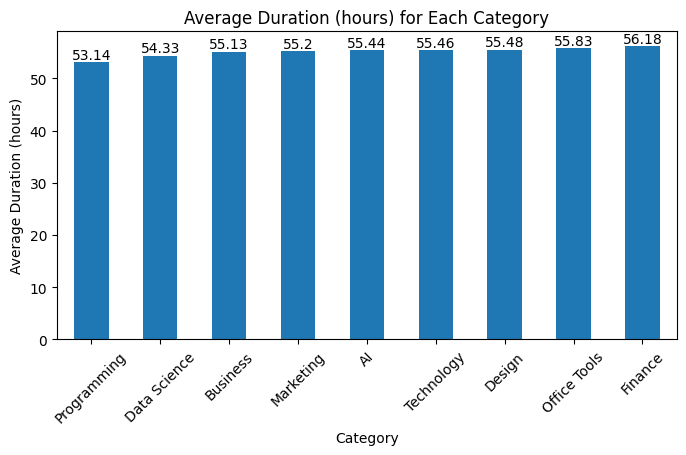

In [12]:
avg_duration_cat = df.groupby('Category')['Duration (hours)'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration_cat.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_duration_cat.plot(kind='bar')
plt.title('Average Duration (hours) for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

BOX 10 Chi-Square Test for Goodness of Fit
H₀: all categories have a similar value for the avg duration
H₁: at least one category has a different cvalue for the avg duration

In [13]:
observed_avg_cat = avg_duration_cat.values  
chi_square_test(observed_avg_cat)

{'Chi-Square Statistic: 0.1183717293348343',
 'P-Value: 0.999999512339227',
 'Result: fail to reject the null hypothesis'}

BOX 11 BARCHART: avg duration for each course per platform, regardeless of the category

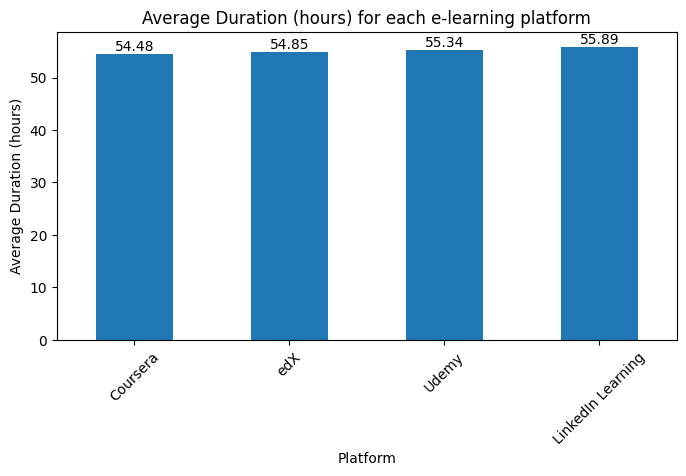

In [14]:
avg_duration_platform = df.groupby('Platform')['Duration (hours)'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration_platform.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_duration_platform.plot(kind='bar')
plt.title('Average Duration (hours) for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

BOX 12 Chi-Square Test for Goodness of Fit
H₀: all platforms have a similar value for the avg duration
H₁: at least one platform has a different value for the avg duration

In [15]:
observed_avg_platform = avg_duration_platform.values  
chi_square_test(observed_avg_platform)

{'Chi-Square Statistic: 0.020277131376671628',
 'P-Value: 0.9992367123485226',
 'Result: fail to reject the null hypothesis'}

BOX 13 BARCHART: total number of students enrolled on each platform

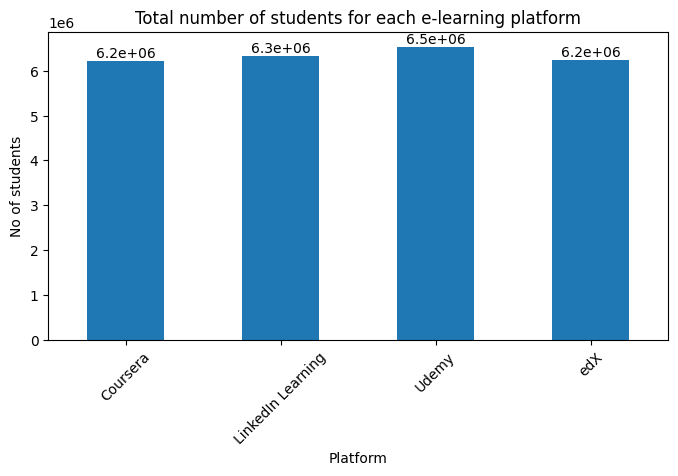

In [16]:
total_enrolled_stud = df.groupby('Platform')['Enrolled_Students'].sum()

plt.figure(figsize=(8, 4))

for i, v in enumerate(total_enrolled_stud.values):
    scientific_notation = "{:.1e}".format(v) 
    plt.text(i, v + v * 0.001, scientific_notation, ha='center', va='bottom')

total_enrolled_stud.plot(kind='bar')
plt.title('Total number of students for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('No of students')
plt.xticks(rotation=45)
plt.show()

BOX 14 Chi-Square Test for Goodness of Fit
H₀: all platforms have a similar number of students
H₁: at least one platform has a different number of students

In [17]:
observed_total_students_platform = total_enrolled_stud.values  
chi_square_test(observed_total_students_platform)

{'Chi-Square Statistic: 10551.426439420971',
 'P-Value: 0.0',
 'Result: reject the null hypothesis'}

BOX 15 BARCHART: avg prices for each platform

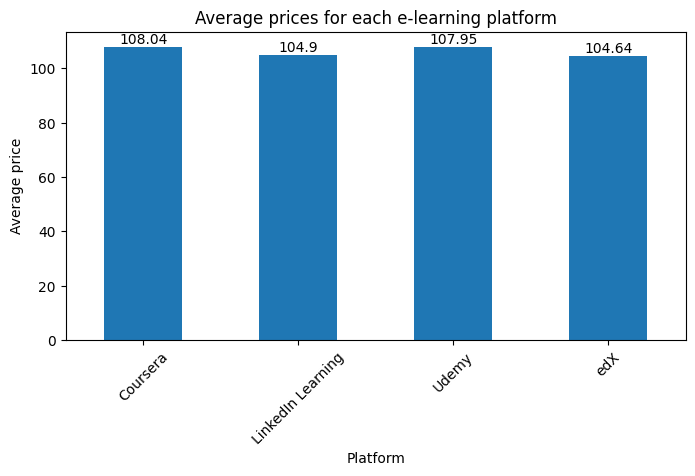

In [18]:
avg_price = df.groupby('Platform')['Price ($)'].mean()

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_price.values):
    plt.text(i, round(v,2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_price.plot(kind='bar')
plt.title('Average prices for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.show()

BOX 16 Chi-Square Test for Goodness of Fit
H₀: all platforms have a similar avg prices
H₁: at least one platform has a different avg price

In [19]:
observed_avg_price = avg_price.values  
chi_square_test(observed_avg_price)

{'Chi-Square Statistic: 0.0981685940697422',
 'P-Value: 0.9920562902756813',
 'Result: fail to reject the null hypothesis'}

BOX 17 Avg price per category taking into account the platform

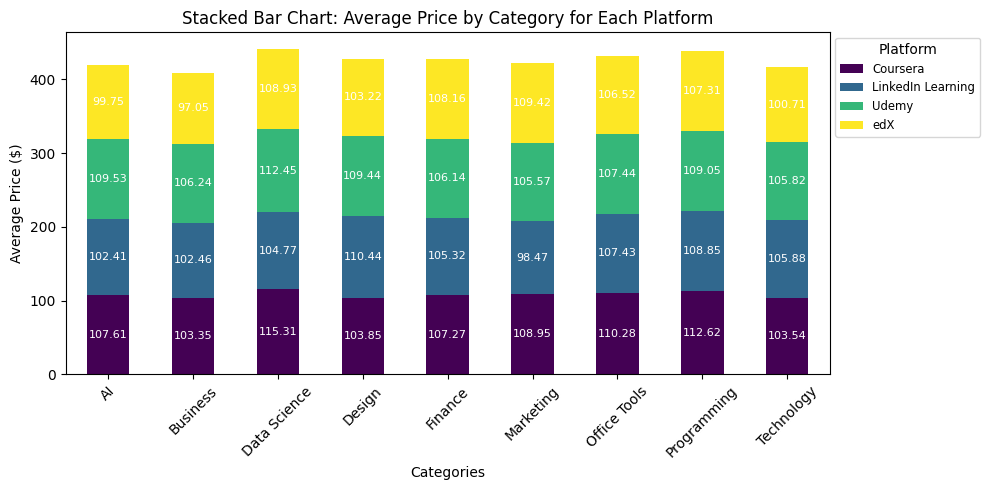

In [20]:
avg_price_per_category = df.groupby(['Category', 'Platform'])['Price ($)'].mean().unstack()

ax = avg_price_per_category.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    colormap='viridis'
)


for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        if bar.get_height() > 0:  
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,  
                bar.get_y() + height / 2,          
                f'{height:.2f}',                   
                ha='center', va='center', fontsize=8, color='white'
            )

plt.title('Stacked Bar Chart: Average Price by Category for Each Platform')
plt.xlabel('Categories')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Platform', fontsize='small', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()

plt.show()


BOX 18 Avg price per rating taking into account the platform

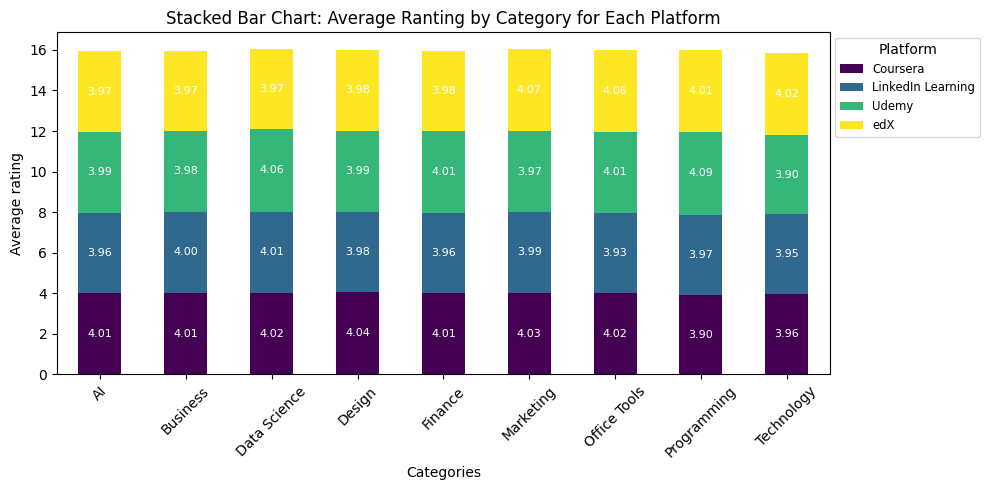

In [21]:
avg_rating_per_category = df.groupby(['Category', 'Platform'])['Rating (out of 5)'].mean().unstack()

ax = avg_rating_per_category.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    colormap='viridis'
)


for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        if bar.get_height() > 0:  
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,  
                bar.get_y() + height / 2,          
                f'{height:.2f}',                   
                ha='center', va='center', fontsize=8, color='white'
            )

plt.title('Stacked Bar Chart: Average Ranting by Category for Each Platform')
plt.xlabel('Categories')
plt.ylabel('Average rating')
plt.xticks(rotation=45)
plt.legend(title='Platform', fontsize='small', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()

plt.show()


RELATIONSHIP BETWEEN DATA

BOX 1 covariance between numeric variables

In [22]:
numeric_columns = ['Duration (hours)', 'Enrolled_Students', 'Completion_Rate (%)', 'Price ($)', 'Rating (out of 5)']
numeric_data = df[numeric_columns]

covariance_matrix = numeric_data.cov()

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                     Duration (hours)  Enrolled_Students  Completion_Rate (%)  \
Duration (hours)           686.400304       2.063626e+02             5.033802   
Enrolled_Students          206.362604       2.027230e+06          -419.970931   
Completion_Rate (%)          5.033802      -4.199709e+02           209.153442   
Price ($)                    4.197661      -2.513864e+02           -13.109155   
Rating (out of 5)           -0.153741      -1.167105e+01            -0.039793   

                       Price ($)  Rating (out of 5)  
Duration (hours)        4.197661          -0.153741  
Enrolled_Students    -251.386379         -11.671048  
Completion_Rate (%)   -13.109155          -0.039793  
Price ($)            3036.085488          -0.231200  
Rating (out of 5)      -0.231200           0.331202  


BOX 2 Correlation - spearman coeff

In [23]:
spearman_corr = numeric_data.corr(method='spearman')
print("Spearman Correlation Matrix:")
print(spearman_corr)


Spearman Correlation Matrix:
                     Duration (hours)  Enrolled_Students  Completion_Rate (%)  \
Duration (hours)             1.000000           0.005260             0.013214   
Enrolled_Students            0.005260           1.000000            -0.020409   
Completion_Rate (%)          0.013214          -0.020409             1.000000   
Price ($)                    0.002874          -0.003127            -0.016377   
Rating (out of 5)           -0.010251          -0.014363            -0.004789   

                     Price ($)  Rating (out of 5)  
Duration (hours)      0.002874          -0.010251  
Enrolled_Students    -0.003127          -0.014363  
Completion_Rate (%)  -0.016377          -0.004789  
Price ($)             1.000000          -0.007528  
Rating (out of 5)    -0.007528           1.000000  


BOX 3 Correlation - Kendall coeff

In [24]:
kendall_corr = numeric_data.corr(method='kendall')
print("Kendall Correlation Matrix:")
print(kendall_corr)


Kendall Correlation Matrix:
                     Duration (hours)  Enrolled_Students  Completion_Rate (%)  \
Duration (hours)             1.000000           0.003526             0.008817   
Enrolled_Students            0.003526           1.000000            -0.013574   
Completion_Rate (%)          0.008817          -0.013574             1.000000   
Price ($)                    0.001968          -0.002011            -0.010895   
Rating (out of 5)           -0.006879          -0.009530            -0.003159   

                     Price ($)  Rating (out of 5)  
Duration (hours)      0.001968          -0.006879  
Enrolled_Students    -0.002011          -0.009530  
Completion_Rate (%)  -0.010895          -0.003159  
Price ($)             1.000000          -0.004966  
Rating (out of 5)    -0.004966           1.000000  


BOX 4 Scatter plots for each pair of numeric variables

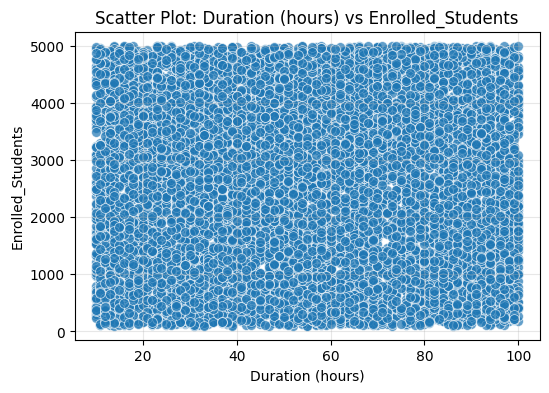

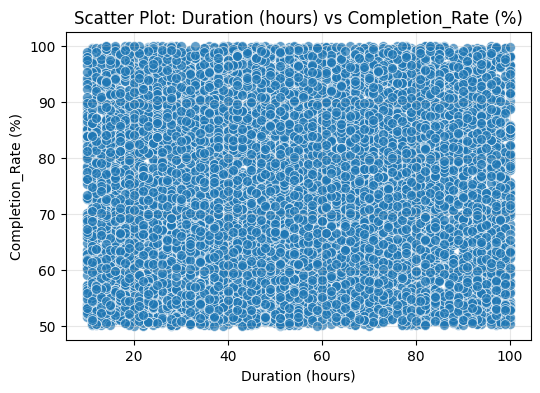

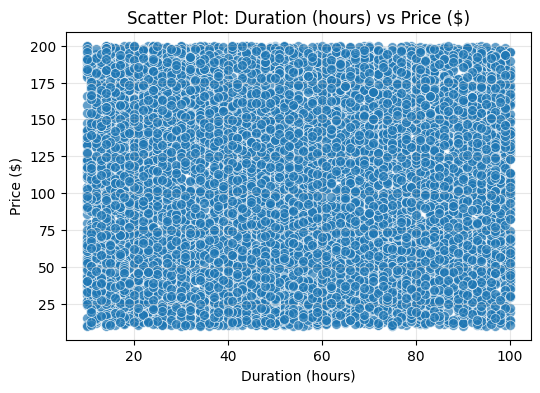

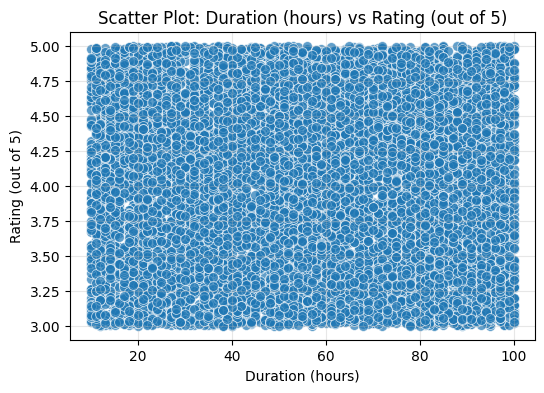

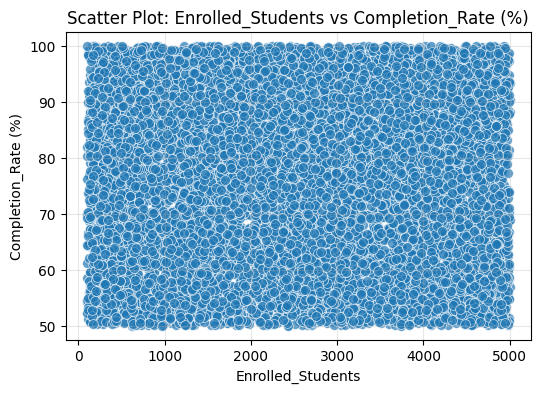

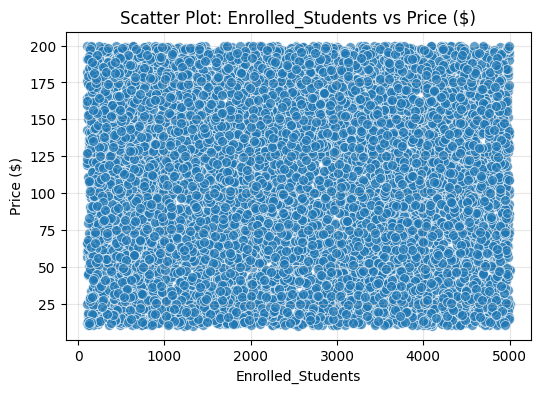

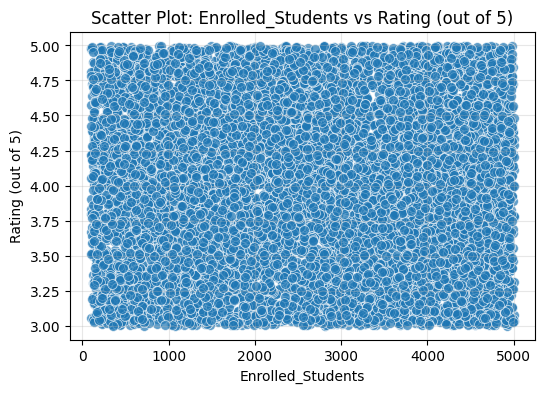

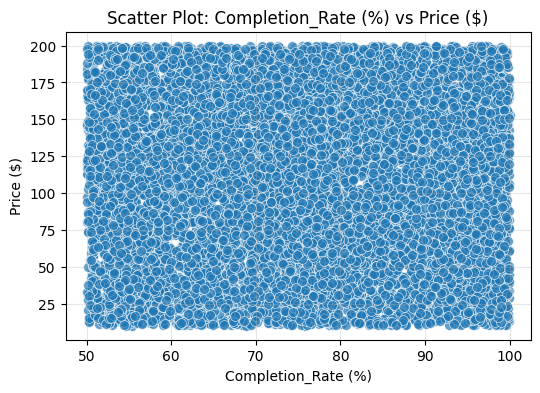

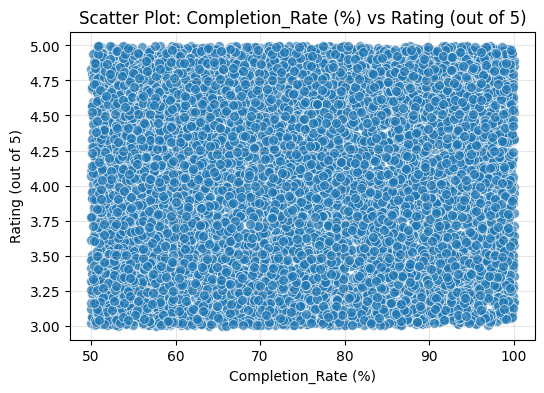

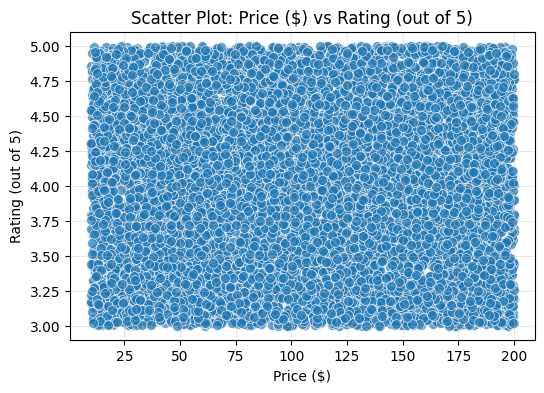

In [25]:
for i, col1 in enumerate(numeric_columns):
    for col2 in numeric_columns[i+1:]:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=numeric_data, x=col1, y=col2, alpha=0.7, s=50)
        plt.title(f"Scatter Plot: {col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(alpha=0.3)
        plt.show()

BOX 5: normalization + standardisation for numeric data + saving then in new cvs s

In [28]:
non_numeric_columns = ['Course_Name', 'Category', 'Platform']

numeric_data = df[numeric_columns]
non_numeric_data = df[non_numeric_columns]

scaler = StandardScaler()  # For standardization (z-score normalization)
normalizer = MinMaxScaler()  # For normalization (0-1 scaling)

standardized_data = scaler.fit_transform(numeric_data)

normalized_data = normalizer.fit_transform(numeric_data)

standardized_df = pd.DataFrame(standardized_data, columns=numeric_columns)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

df_standardized = pd.concat([non_numeric_data, standardized_df], axis=1)
df_normalized = pd.concat([non_numeric_data, normalized_df], axis=1)

df_standardized.to_csv('standardized_data.csv', index=False)
df_normalized.to_csv('normalized_data.csv', index=False)

print("Standardized data saved to 'standardized_data.csv'")
print("Normalized data saved to 'normalized_data.csv'")




Standardized data saved to 'standardized_data.csv'
Normalized data saved to 'normalized_data.csv'


BOX 6: plots for standardised and normalized data

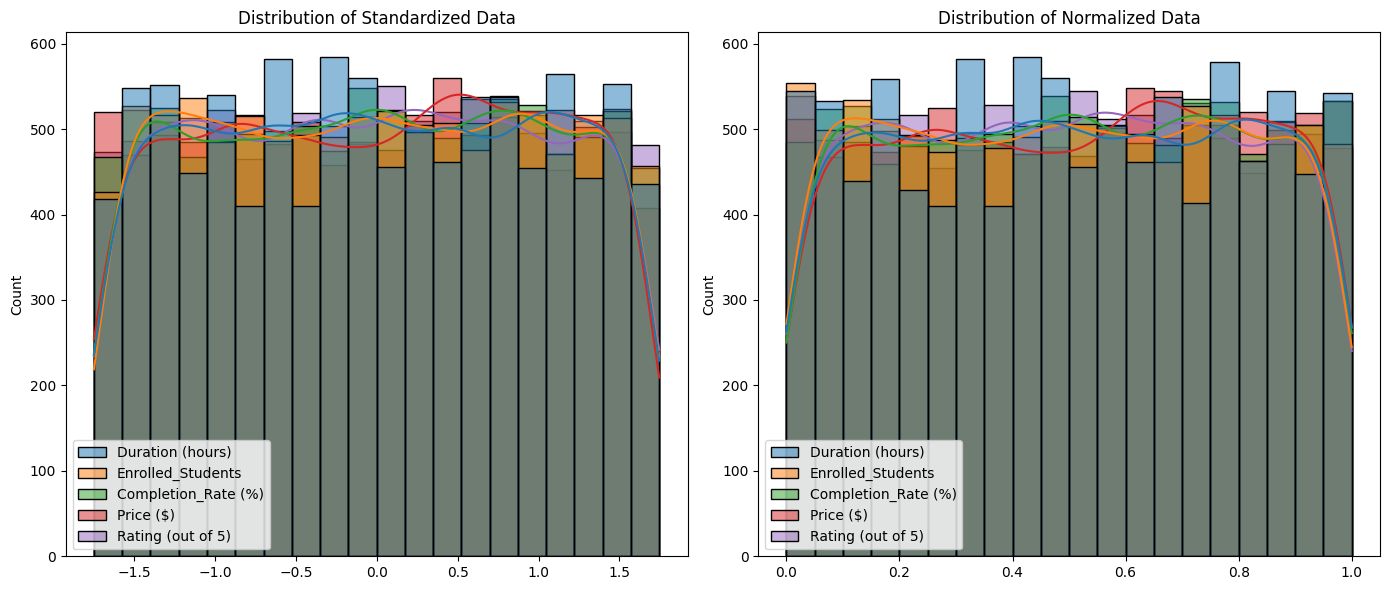

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(standardized_df, kde=True, bins=20)
plt.title('Distribution of Standardized Data')

plt.subplot(1, 2, 2)
sns.histplot(normalized_df, kde=True, bins=20)
plt.title('Distribution of Normalized Data')

plt.tight_layout()
plt.show()
